# Lab Tasks

## Task 2 - Biomedical Signals
(6 point)

### 2.1
- Pick an ECG, EEG, PCG, EMG and blood pressure signal from corresponding databases
- Export them as mat and  save the info files also

### 2.2
- Load the mat file into PyCharm
- Explain what is recorded in the info file

### 2.3
- Explain what the base and the gain of a signal is, and how it is introduced into your measurement.
- Create a parser for the info files. This should extract the length, the sample rate/sample interval, the name, the base, the gain, and the unit for each signal. Also create a plotter function/script. You will use this function throughout the semester.
- Plot the base and gain corrected data of all the leads (in subplots) from each downloaded file (separate figures) to represent the biomedical signal. Mind the axis labels!
- What is the Fourier-transform (FFT)? Explain it in your own words
- Calculate the FFT and plot it in a new figure



Resources:
- Main page: https://physionet.org/
- PhysioBank ATM: https://archive.physionet.org/cgi-bin/atm/ATM


#### Base and Gain 
Gain is used to scale the amplitude of the signal. It specifies the difference in sample values that would be observed if a step of one physical unit occurred in the original analog signal. Base refers to an offset that needs to be subtracted to normalize the signal [1]. 

Gain is introduced using amplifiers. Signals are amplified to ensure they are accurately detected and processed by equipment. Base may exist in signals inherently in the form of offset due to the sensor callibration.

[1] George B. Moody - WFDB header file format, 8 March 2019, accesed on 21 September 2024 https://archive.physionet.org/physiotools/wag/header-5.htm 

#### Fourier Transform
The Fourier Transform decomposes a signal into its constituent frequencies. It shows us the different frequencies that make up a signal and how much each frequency contributes. In simple terms, if you have a complex signal with lots of different wave patterns, the FFT breaks it down into the individual frequencies that make up that signal. It is used to analyze the frequency content of a time-domain signal, showing which frequencies are present and their relative magnitudes [2].

[2] Bracewell, Ronald N. "The fourier transform." Scientific American 260, no. 6 (1989): 86-95.

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

def parse_info(file_path):
    """
    Parameters:
    - file_path: str, path to the .info file. (DO NOT INCLUDE THE ".info" EXTENSION IN THE file_path!)
    Returns:
    - info: dict, containing parsed metadata.
    """
    info = {}
    # Read the file
    with open(file_path + ".info", 'r') as file:
        file = file.readlines() 
        signals = []
        # Read the fixed information at the beginning
        info['Source'] = file[0].split(':', 1)[1]
        info['Rows'] = int(file[1].split(' ')[2])
        info['Columns'] = int(file[1].split(' ')[6])
        info['Duration'] = file[2].split(':', 1)[1]
        info['Sampling frequency'] = file[3].split('  ')[0].split(':')[1].strip()
        info['Sampling interval'] = file[3].split('  ')[1].split(':')[1].strip()
        # Read the info for each signal
        for line in file[5:-4]:
            signal = {}
            signal['Signal'] = line.split('\t')[1].strip()
            signal['Gain']   = float(line.split('\t')[2].strip())
            signal['Base']   = float(line.split('\t')[3].strip())
            signal['Units']  = line.split('\t')[4].strip()
            signals.append(signal)
        info['Signals'] = signals
    return info

def calibrate_signal(signal, base, gain):
    """
    Parameters:
    - signal: numpy array, the raw signal data.
    - base: float, the baseline offset to subtract.
    - gain: float, the gain factor to apply.
    Returns:
    - calibrated_signal: numpy array, the base and gain corrected signal.
    """
    return (signal - base) / gain

def plot_signals(file_path, info_=False, idx=-1):
    """
    Parameters:
    - file_path: str, path to the .mat file. (DO NOT INCLUDE THE ".mat" EXTENSION IN THE file_path!)
    - info_: bool, is info needs to be displayed. Deafult is false
    - idx: int, the index of the signal to be shown. -1 for all signals. Default is -1
    """
    mat_data = scipy.io.loadmat(file_path + ".mat")
    info = parse_info(file_path)
    if info_:
        display(info)
    if idx == -1:
        for idx, signal in enumerate(info["Signals"]):
            raw_signal = mat_data["val"][idx]
            unit = signal["Units"]
            sampling_interval = info['Sampling interval']
            calibrated_signal = calibrate_signal(raw_signal, signal["Base"], signal["Gain"])
            plt.figure(figsize=(12, 4))
            plt.plot(calibrated_signal)
            plt.title(signal["Signal"])
            plt.xlabel(f"Time ({sampling_interval})")
            plt.ylabel(f"Amplitude ({unit})")
            plt.show()
            plot_fft(calibrated_signal, float(info['Sampling frequency'][:-3]) , title=f"FFT of {signal['Signal']}")
    else:
        signal = info["Signals"][idx]
        raw_signal = mat_data["val"][idx]
        unit = signal["Units"]
        sampling_interval = info['Sampling interval']
        calibrated_signal = calibrate_signal(raw_signal, signal["Base"], signal["Gain"])
        plt.figure(figsize=(12, 4))
        plt.plot(calibrated_signal)
        plt.title(signal["Signal"])
        plt.xlabel(f"Time ({sampling_interval})")
        plt.ylabel(f"Amplitude ({unit})")
        plt.show()
        plot_fft(calibrated_signal, float(info['Sampling frequency'][:-3]) , title=f"FFT of {signal['Signal']}")
        
def plot_fft(signal, sampling_frequency, title='FFT of Signal'):
    """
    Parameters:
    - signal: numpy array, the time-domain signal.
    - sampling_frequency: float, the sampling frequency of the signal.
    - title: str, the title of the FFT plot.
    """
    n = len(signal)
    fft_values = np.fft.fft(signal)
    # Calculate frequencies based on sampling frequency
    fft_frequencies = np.fft.fftfreq(n, d=1/sampling_frequency)
    # Filter the frequencies to get only positives
    fft_values = np.abs(fft_values[fft_frequencies > 0])
    fft_frequencies = fft_frequencies[fft_frequencies > 0]
    plt.figure(figsize=(12, 4))
    plt.plot(fft_frequencies, fft_values)
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.show()

#### ECG

{'Source': ' record apnea-ecg/a01\n',
 'Rows': 1,
 'Columns': 6000,
 'Duration': '     1:00\n',
 'Sampling frequency': '100 Hz',
 'Sampling interval': '0.01 sec',
 'Signals': [{'Signal': 'ECG', 'Gain': 200.0, 'Base': 0.0, 'Units': 'mV'}]}

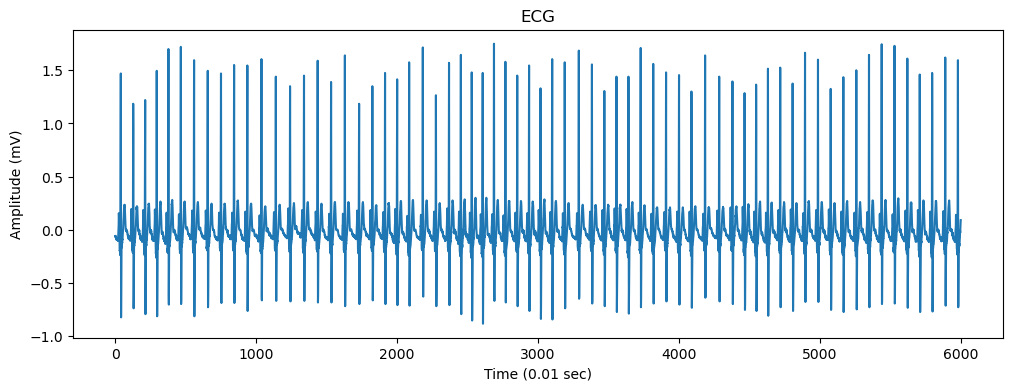

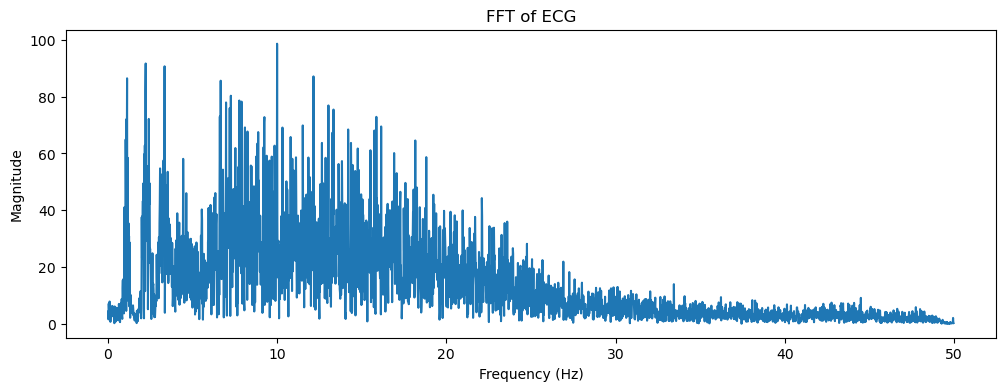

In [2]:
plot_signals("a01m", info_=True)

#### EEG

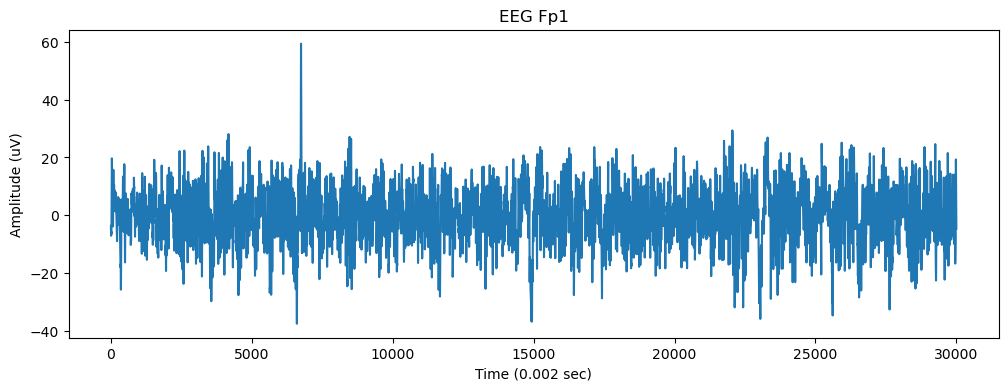

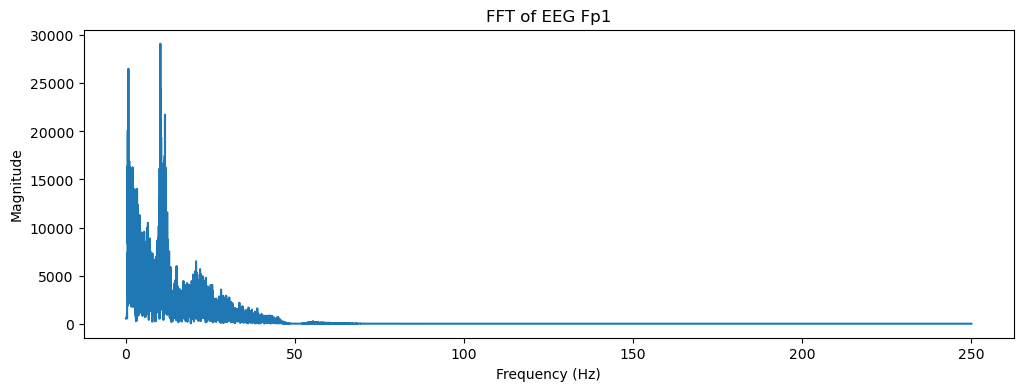

In [3]:
plot_signals("Subject00_1_edfm", info_=False, idx=0)

#### PCG

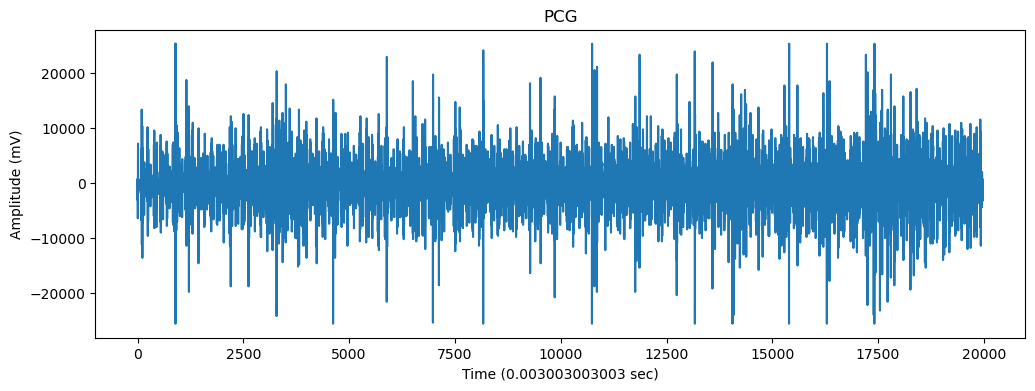

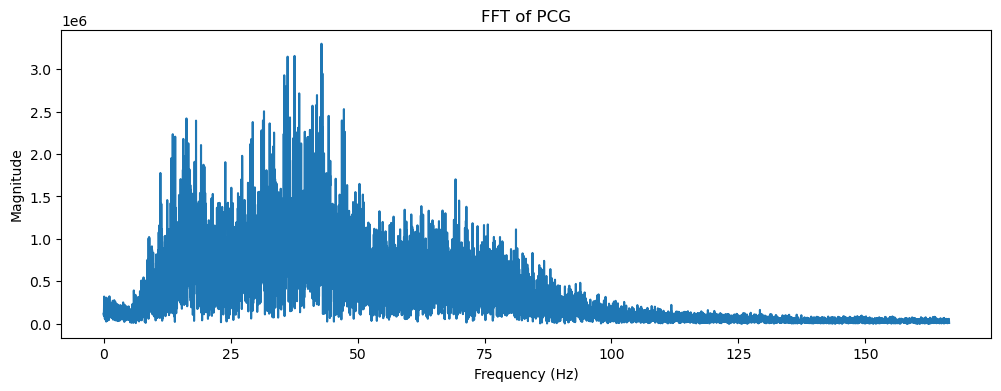

In [4]:
plot_signals("fetal_PCG_p01_GW_36m")

#### EMG

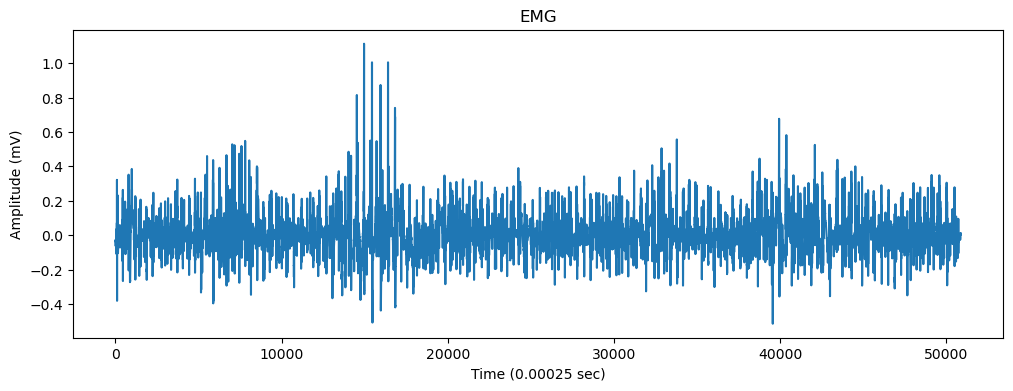

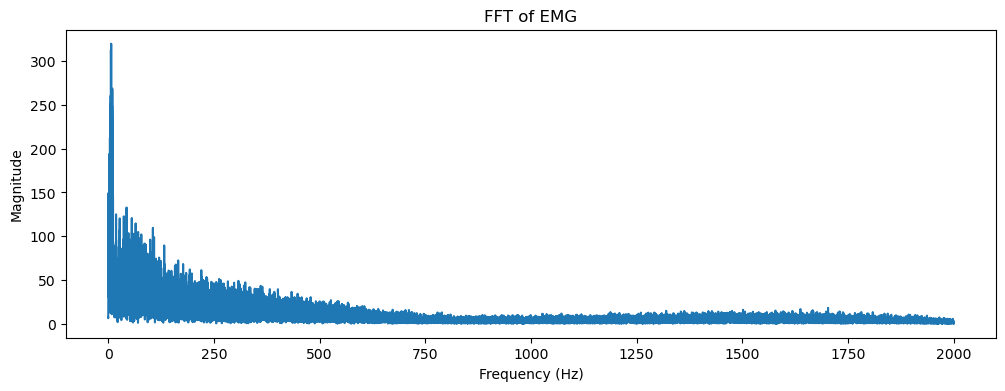

In [5]:
plot_signals("emg_healthym")

## TASK 3 – Pathology
(3 point)

- Find an example pathology for the above-mentioned different signal types. You can use other sources, not just PhysioNet
- Explain the underlying cause, the risks and the related diseases/disorders
- How does it show up on the signal in time-domain and/or frequency-domain

### Myopathy
**Underlying Cause:** Myopathy is a disease that affects the muscles. It can be caused by genetic factors, autoimmune disorders, infections, or medications.  
**Risks:** Myopathy can lead to muscle weakness, pain, and difficulty with movement. In severe cases, it can also affect breathing and swallowing.  
**Related Diseases:** Examples of myopathies include muscular dystrophy, polymyositis, and dermatomyositis.  
**EMG Signal Characteristics:**
In the time domain, myopathy is often characterized by the presence of complex repetitive discharges, a series of abnormal electrical discharges. In the frequency domain, myopathy can lead to an increase in the frequency of the EMG signal due to the increased number of active motor units. However, the amplitude of the signal may be lower than normal due to muscle weakness. In the data that we exported from physionet, we can see that the emg of myopathy patient has a series of additional repetitive charges. In FFT graph, we also observe the presence of the higher frequency signals and decrease in the amplitude of the signals. Our observations are consistent with the EMG characteristics.

<img src="https://archive.physionet.org/physiobank/database/emgdb/emg.png" style="width: 40%;"/>

[3] Electrodiagnostic Evaluation of Myopathy: https://www.ncbi.nlm.nih.gov/books/NBK564383/

[4] Examples of Electromyograms https://archive.physionet.org/physiobank/database/emgdb/

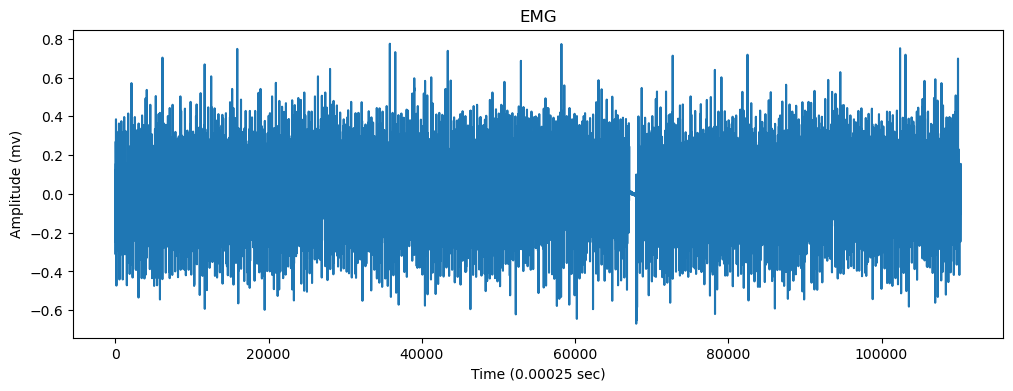

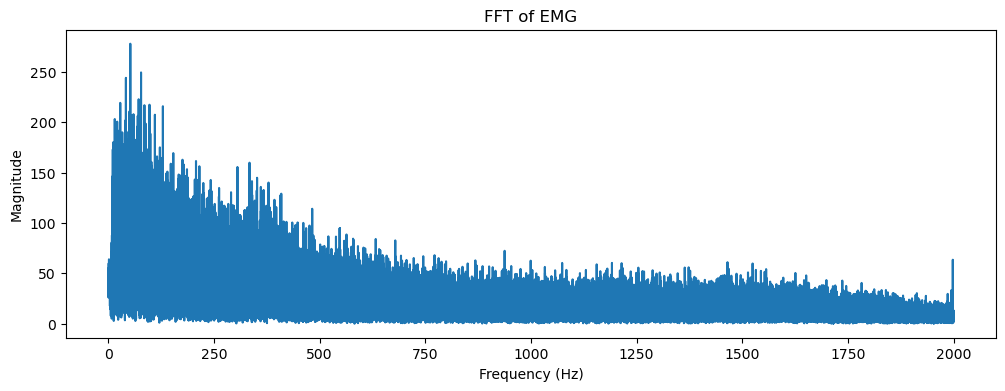

In [6]:
plot_signals("emg_myopathym")

# Lecture Notes

## Week 1

### Introduction to Biomedical Signal Processing

Biomedical signals are measurable quantities recorded from the body over time such as heart rate, blood pressure etc that provide insights on your health.

#### Examples of Biomedical Signals

<img src="https://i0.wp.com/www.biomedicalinstrumentationsystems.com/wp-content/uploads/2020/04/Fig-2-Sources-of-Biomedical-Signals-1.png?w=542&ssl=1" style="width: 40%;"/>

*https://www.biomedicalinstrumentationsystems.com/sources-of-biomedical-signals/*

- **ECG:** Electrodes are placed on either the chest, wrists or ankles to measure electrical activity of the heart. Applicable in the ICU, gyms, automatic defibrillators etc.
- **EEG:** Electrodes are placed on the scalp to give insights on brain functionality, sleep quality by measuring brain waves during different sleep states, brain computer interface for incapacitated people or for playing video games, to detect seizures beforehand and to localize them to specific parts of the brain.
- **EMG:** Electrodes are placed in the muscle and electric signals are sent to check muscle conductivity. It gives insights into muscle health and helps detect malfunctioning nerves, muscle diseases and inflammation.
- **Phonocardiography:** Allows you to listen to the heart and breathing. One application is listening to the fetal heartbeat from the belly of the mother. 
- **Pulse Oximetry:** LEDs are used to emit light which is reflected from the blood in the finger or wrist. It monitors how blood is pulsating in the veins. The change of blood volume or oxygenation is measured through oxygen level from the finger. It gives insights on how healthy the circulation is and how much oxygen is going into the system. Commonly used in ICUs and during fitness activities. It can even be measured using a smartphone camera. 
- **Blood Pressure:** The simple method measures blood pressure from the arm or wrist. It can also be measured invasively using a catheter in the heart. It provides information on how you are responding to medication and helps highlight pinched or clogged veins.

### Usage of Biomedical Signals

- Diagnosis of pathologies
- Action control in gaming
- Rehabilitation of motor functions after injury 
- Measuring heart activity during sports
- Brain computer interfaces for prosthetic control and speech generation
- ICUs for consistent monitoring
- Research purposes

### Instrument Design Aspects

- **Stable:** Should be able to run for a long time without failure
- **Real-time:** signals should be processed on the spot. For example for the detection of seizures.
- **Non invasive:** Minimally invasive techniques should be used. For example blood pressure cuffs should be preferred over the catheter approach.
- **Safety:** Patients should be safe from electric shocks and other dangers such as constriction in blood circulation from pulse oximetry.
- **Suitable SNR:** Noise can be introduced from inside and outside of the body. Noise should be removed from the signal as much as possible.

### Processing of Biomedical Signals
- **Genesis:** Signals are produced by what is happening in the body
- **Model:** Mathematics to have a better understanding and for better processing of the signal
- **Filtering:** Noise removal
- **Event Detection:** Measuring different parameters of a signal or pathologies of a signal. E.g. heart rate is an event to be measured.
- **Feature Extraction:** Spectral estimation, wavelet transformation
- **Source Separation:** For example fetal heartbeat separation
- **Classification:** Useful information for diagnosis

## Week 2

### Heart Model
Heart can be modeled as a simple pump. A wheel can generate a constant pressure difference in a pipe, causing liquid to flow. However, there are many dissimilarities with the actual functionality of the heart. 

- In mammals, the heart has two pumps - left and right one for the lungs and the other for the rest of the body.
- Non uniform cross section: Arteries are much thicker than capillaries. Cross section gets smaller and smaller as the blood flows.
- Non rigid veins and arteries.
- Blood leakage: Some blood collects waste from cells and collects it in the lymphatic system.
- Non uniform pressure gradient due to pumping and the elasticity of the heart.

<img src="https://humanap.community.uaf.edu/wp-content/uploads/sites/848/2023/04/Screenshot-2023-04-20-at-11.12.24-PM-768x583.png" style="width: 40%;"/>

*https://humanap.community.uaf.edu/2023/04/20/the-path-of-blood-through-the-heart-and-circulatory-system/*


### Blood Pressure Signals
As the ventricle contracts, the blood pressure goes up and there is a peak. As the amount of blood drops, the pressure decreases. The walls of the veins flap between systolic and diastolic pressure. As the semilunar valves are closing and the blood flows towards the veins, some pressure is reflected due to the narrowness of the veins and blood flows back towards the closed valved causing the dicrotic notch. Veins get stiffer with age so in young people the dicrotic notch is more prominent.

#### Measurement of Blood Pressure

Apply pressure on the upper arm or wrists using a cuff to close the veins and listen to the sound produced to measure the blood pressure. Electronic measurement devices use the same methodology.

### Origin of Heart Sound
Caused by the opening and closing of valves.

**S1:** Atrioventricular valves close - *lub* sound

**S2:** Semilunar values close - *dub* sound

More sounds may indicate a pathology. The heart rate signal visibly shifts when you breathe. 

### Photoplethysmography (PPG)
It is a measurement of optical signals coming from the heart. An LED is used as a light source to lighten the veins. A receiver measures the amount of reflected light. As the heart cycle changes, there will be more or less blood flowing, changing the amount of reflected light. It can be measured from either the wrist or the fingertip but in that case the light source is on one side and the detector on the other side of the finger.

### Pulse Oximetry
2 LEDs of different frequencies are absorbed differently in tissues. In oxygenated blood, red light is measured in a lower ratio. In deoxygenated blood, more red light is absorbed. Pulse oximetry helps calculate oxygenated vs deoxygenated blood ratio.

### Electric signals in the body
Our neurons have electricity. There is negative charge inside the cell and positive charge outside it.

<img src="https://upload.wikimedia.org/wikipedia/commons/7/78/Apshoot.jpg" style="width: 40%;"/>

*By <a class="external free" href="https://en.wikipedia.org/wiki/User:Memenen">http://en.wikipedia.org/wiki/User:Memenen</a> - <a class="external free" href="https://en.wikipedia.org/wiki/File:Apshoot.jpg">http://en.wikipedia.org/wiki/File:Apshoot.jpg</a>, <a href="https://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=10516286">Link</a>*

An action potential travels down an axon as ions move through ion channels. In unmyelinated axons, this process is slower because the signal moves continuously. In myelinated axons, the signal propagates quicker.

Electric signals can be measured on the surface of the body. Potential difference between two points in the body can be measured by electrodes. 

#### Heart Dipole Model
To contract the muscles we need electricity generated by cells in the heart. Potential difference between any two points is depicted as a dipole. 

#### ECG 12 Lead System
Electrodes are placed on the chest, wrists and ankles and between two electrodes a signal is measured. 12 different waveforms from different directions are measured, giving insights onto how the heart is working. 

<img src="https://www.researchgate.net/publication/371052743/figure/fig1/AS:11431281210492387@1702046732241/ECG-electrode-placement-The-name-and-placement-of-the-standard-ten-electrodes-used-to.tif" style="width: 40%;"/>

Source: [ResearchGate](https://www.researchgate.net/figure/ECG-electrode-placement-The-name-and-placement-of-the-standard-ten-electrodes-used-to_fig1_371052743) [accessed 22 Sept 2024].

##### Vectorcardiography
We don't actually need 12 signals. In theory, 3 different measurements are sufficient. One signal can be made as a combination of other signals. The 12 lead system is just too established. 

If signals are measured from orthogonal directions, signals will be orthogonal too usually. 

### EEG

#### Pyramidal Cells
Pyramidal cells are the most common type of cells in the brain, named after their shape. Pyramidal cells are oriented perpendicular to the surface of the cortex.

#### 10/20 System
A standardized method for placing EEG electrodes on the scalp, ensuring consistent, accurate measurement. 10 and 20 refer to the percentage distances between adjacent electrodes, based on the size of the head.

#### Examples of EEG Signals [3]
- **Alpha waves (8-13 Hz)**: Present during relaxed wakefulness with closed eyes.
- **Beta waves (13-30 Hz)**: Associated with active thinking and focus.
- **Theta waves (4-8 Hz)**: Common during light sleep or deep relaxation.
- **Delta waves (0.5-4 Hz)**: Dominant in deep sleep stages.
- **Gamma waves (>30 Hz)**: Linked to high-level cognitive functioning.

[3] Niedermeyer, E., & da Silva, F. L. (2004). *Electroencephalography: Basic Principles, Clinical Applications, and Related Fields* (5th ed.). Lippincott Williams & Wilkins.
